# Basic XGBoost

In [1]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("pima-indians-diabetes.data.csv", header=None)
features = data.loc[:,0:7]
labels = data.loc[:,8]

Splitting data for cross-validation:

In [3]:
seed, test_size = 7, 0.33
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,
                                                   test_size=test_size,
                                                   random_state=seed)

In [14]:
import time
results = []
num_threads = range(1,5)

for n in num_threads:
    start = time.time()
    model = XGBClassifier(nthread=n)
    model.fit(X_train, Y_train)
    elapsed = time.time() - start
    print(n, elapsed)
    results.append(elapsed)

1 0.033019304275512695
2 0.016956567764282227
3 0.013837814331054688
4 0.014026403427124023


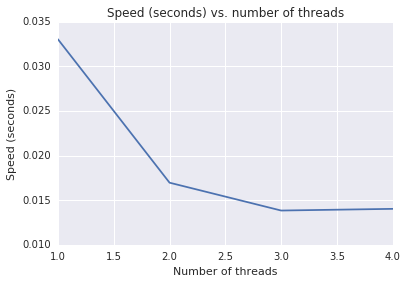

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)

plt.title("Speed (seconds) vs. number of threads")
ax.set_xlabel("Number of threads")
ax.set_ylabel("Speed (seconds)")
ax.plot(num_threads, results)